In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

In [3]:
# Load dataset and check for the info
dataset = pd.read_csv("final_scout_not_dummy.csv")

In [4]:
dataset.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000
mean,18024.380584,32089.995708,5.937355,1.389695,1.042853,88.499340,0.247063,1428.661891,1337.700534,4.832124
std,7381.679318,36977.214964,0.704772,1.121306,0.339178,26.674341,0.431317,275.804272,199.682385,0.867530
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12850.000000,1920.500000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16900.000000,20413.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1295.000000,4.800000
75%,21900.000000,46900.000000,6.000000,2.000000,1.000000,103.000000,0.000000,1598.000000,1472.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [6]:
print(dataset.duplicated().sum())

1673


In [7]:
# Droping the duplicate
dataset.shape
df = dataset.drop_duplicates()
df.shape

(14242, 23)

In [8]:
df = df.reset_index(drop=True)
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14237,Renault Espace,Van,39980,VAT deductible,100.000000,Pre-registered,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...",...,1.0,118.0,0,Metallic,Part/Full Leather,Automatic,1598.0,1734.0,front,4.7
14238,Renault Espace,Van,39950,VAT deductible,1647.362609,New,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...",...,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3
14239,Renault Espace,Van,39950,VAT deductible,1000.000000,Demonstration,Benzine,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...",...,1.0,165.0,0,Metallic,Part/Full Leather,Automatic,1798.0,1734.0,front,6.8
14240,Renault Espace,Van,39885,VAT deductible,9900.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...",...,1.0,165.0,0,Metallic,Cloth,Automatic,1798.0,1708.0,front,7.4


In [9]:
df.columns
# Normalize the column for uniformity
df.columns = df.columns.str.lower()
df.columns


Index(['make_model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel',
       'gears', 'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection_new',
       'paint_type', 'upholstery_type', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'cons_comb'],
      dtype='object')

In [10]:
# Checking unique values
print(df.shape)
cols = df.columns
for col in cols:
    print(f"{col}:",len(df[col].unique()))

(14242, 23)
make_model: 9
body_type: 8
price: 2952
vat: 2
km: 6691
type: 5
fuel: 4
gears: 4
comfort_convenience: 6196
entertainment_media: 346
extras: 659
safety_security: 4442
age: 4
previous_owners: 5
hp_kw: 77
inspection_new: 2
paint_type: 3
upholstery_type: 2
gearing_type: 3
displacement_cc: 68
weight_kg: 432
drive_chain: 3
cons_comb: 62


<Axes: >

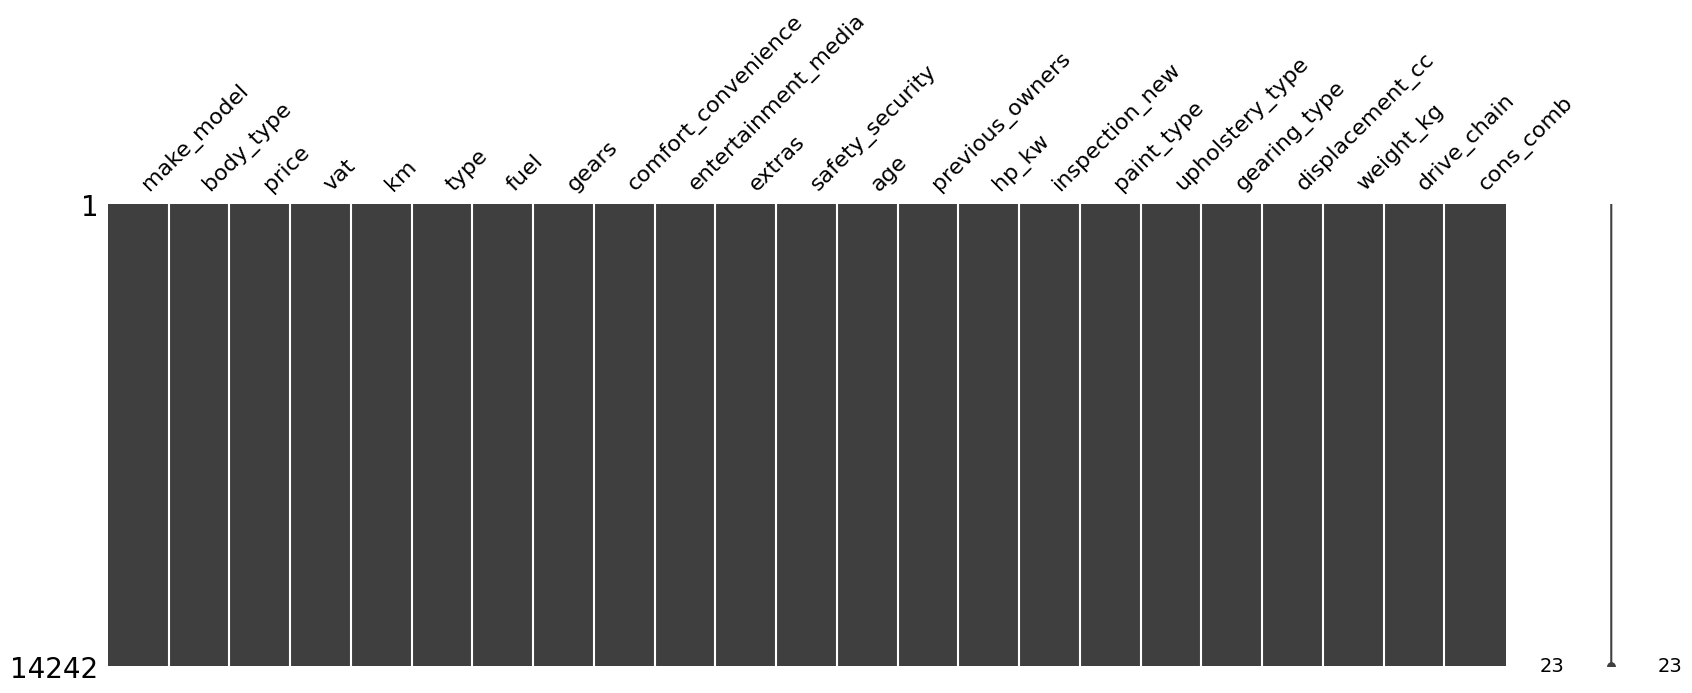

In [11]:
msno.matrix(df, figsize=(20,6))
# There are no missing value in our data

In [12]:
df_numeric = df.select_dtypes(exclude="object")
numeric_cols = df_numeric.columns 

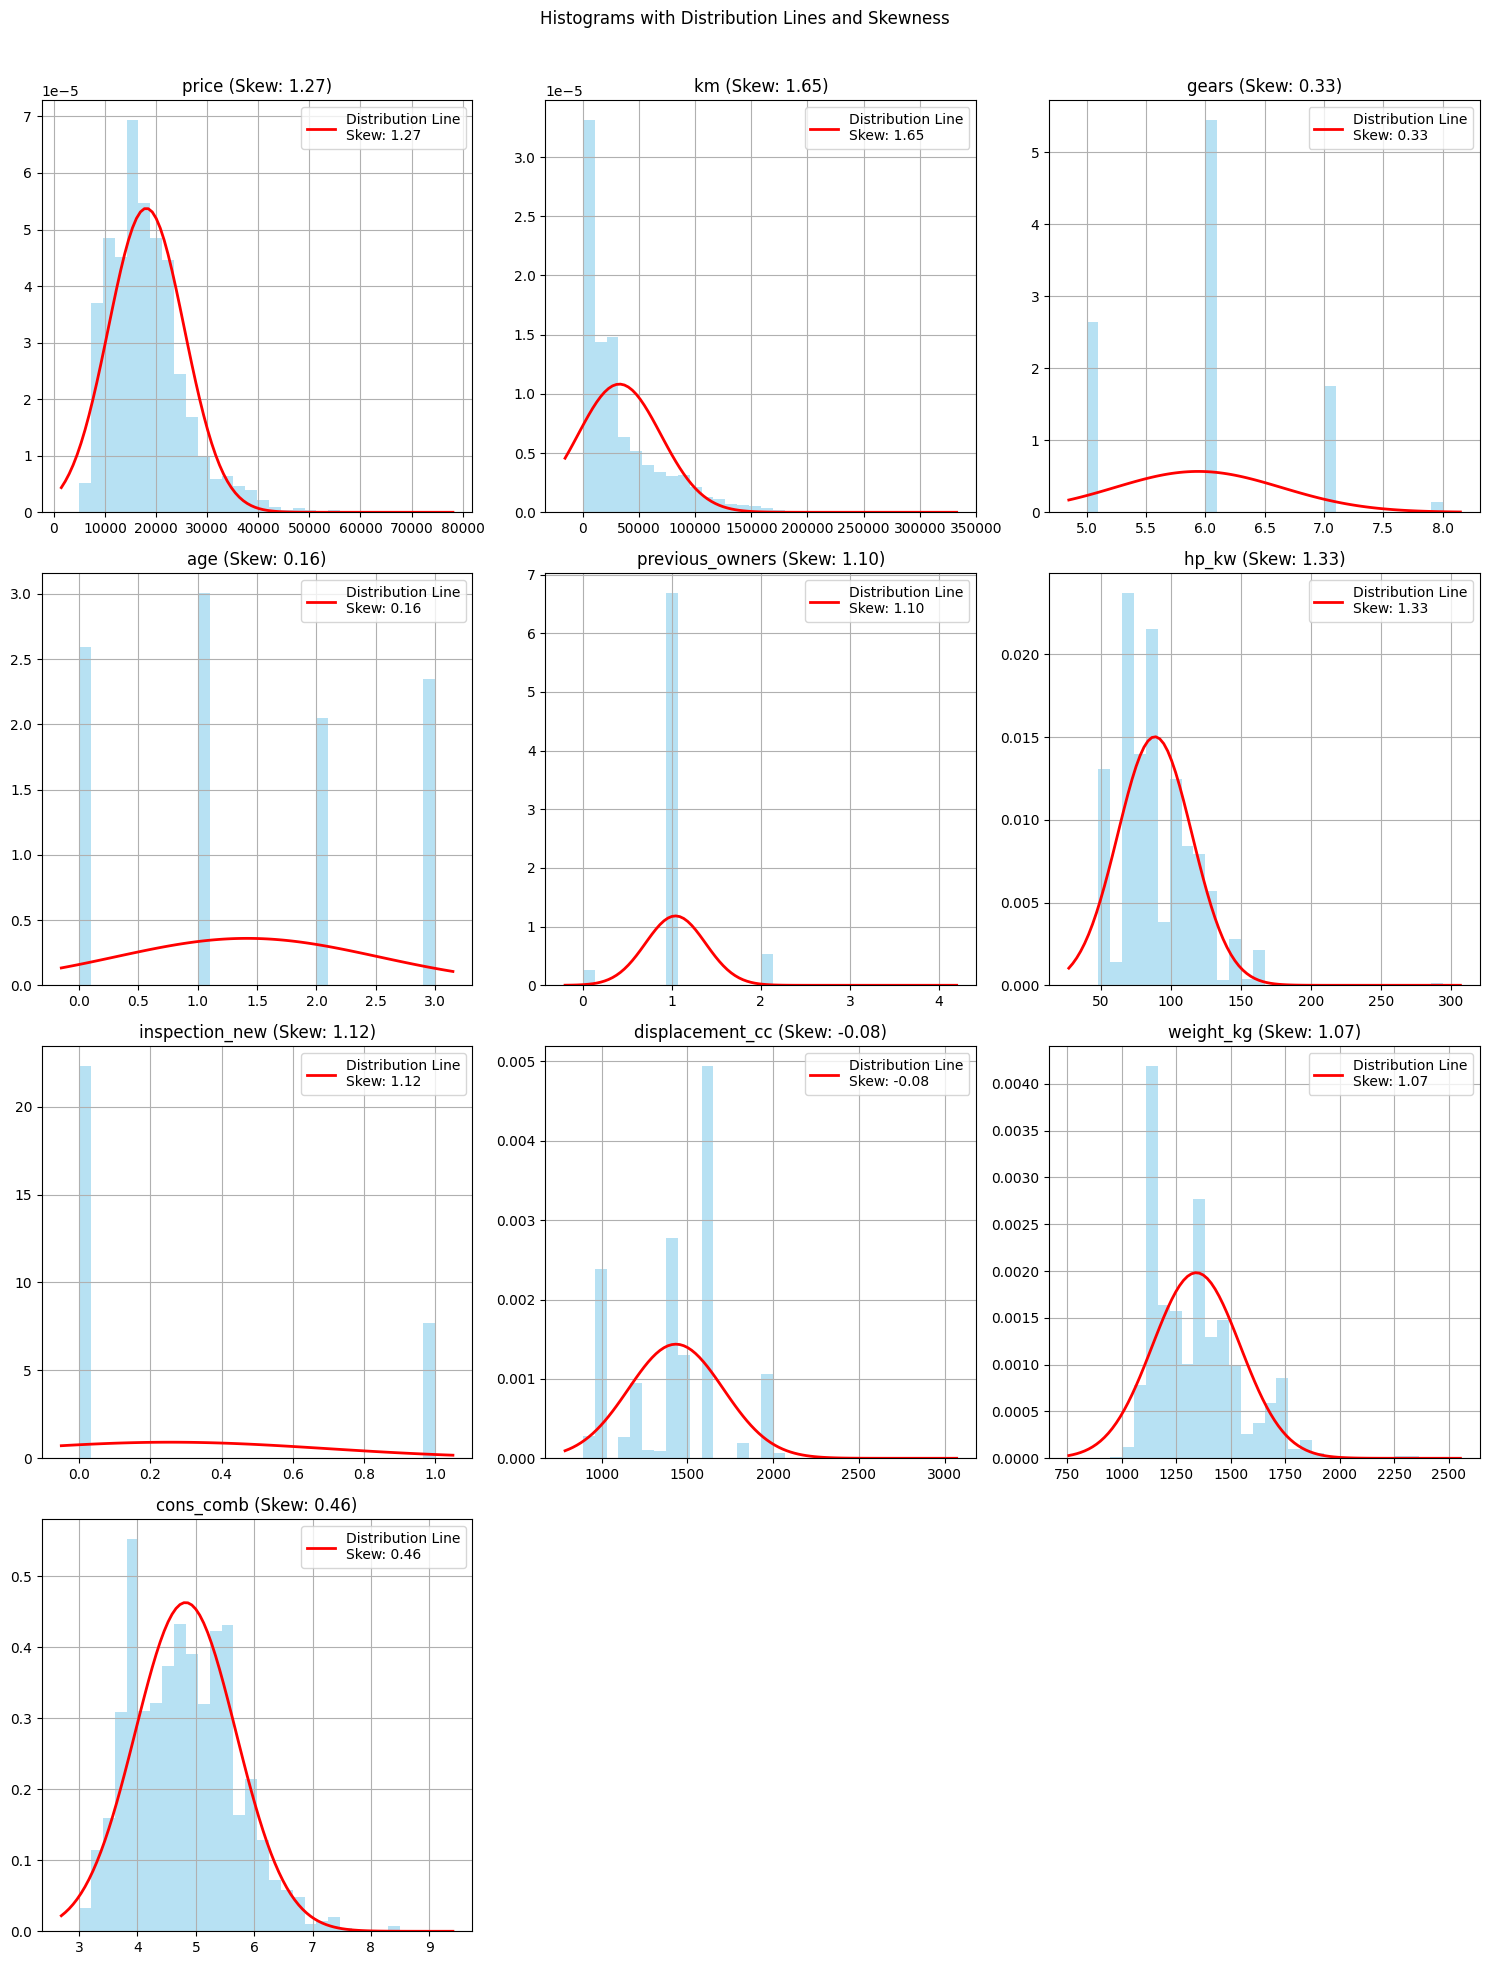

In [13]:

# Checking distribution 

# Create histograms with distribution lines
fig, axes = plt.subplots(len(numeric_cols) // 3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()

for col, ax in zip(numeric_cols, axes):
    # Plot histogram
    df_numeric[col].hist(bins=30, density=True, alpha=0.6, color='skyblue', ax=ax)
    
    # Fit normal distribution
    mean, std = norm.fit(df_numeric[col])
    
    # Generate distribution line
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2)

    # Calculate skewness
    skew_val = skew(df_numeric[col].dropna())
    
    # Update title and legend
    ax.set_title(f'{col} (Skew: {skew_val:.2f})')
    ax.legend([f'Distribution Line\nSkew: {skew_val:.2f}'], loc='upper right')

# Remove unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.suptitle('Histograms with Distribution Lines and Skewness')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

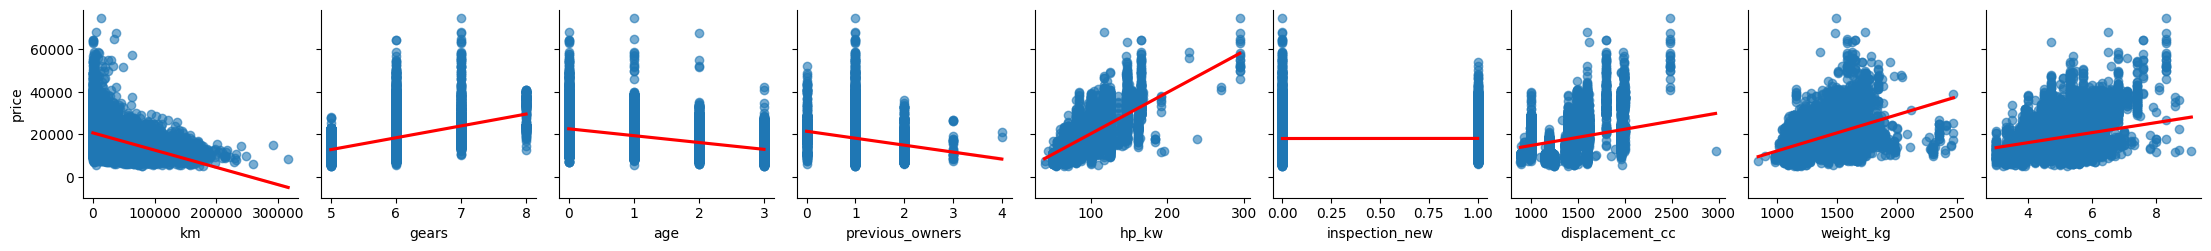

In [14]:
# Checking correlation whether the data is linear
sns.pairplot(df_numeric, x_vars=df_numeric.columns.drop('price'), y_vars='price',
             kind='reg', 
             plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.6}})
plt.show()

<Axes: >

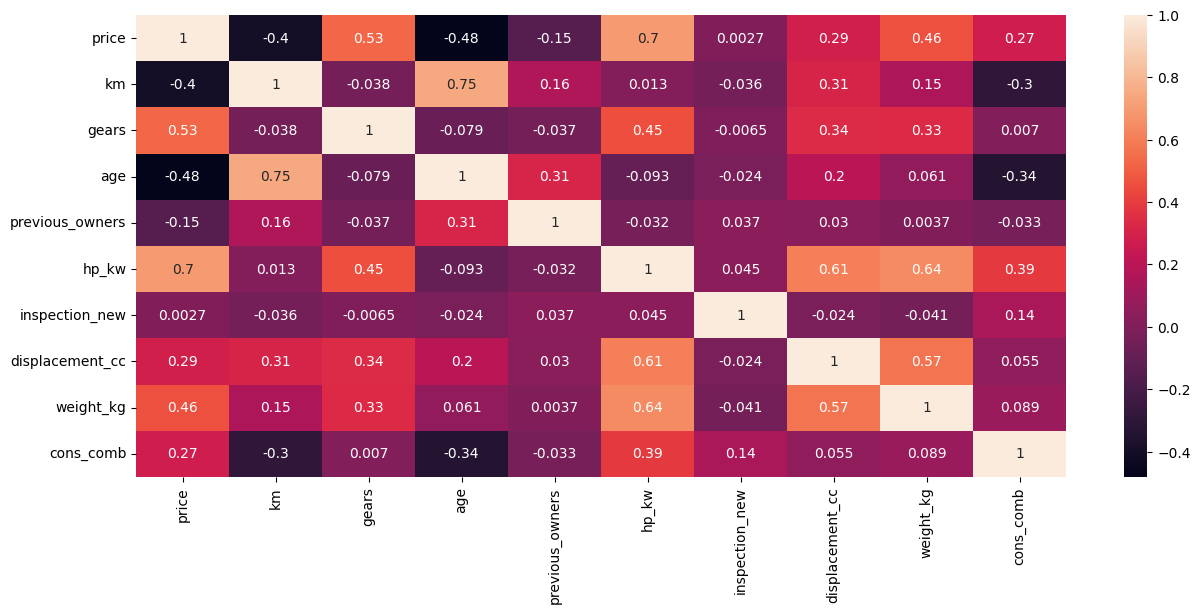

In [15]:
# checking for correlation
plt.figure(figsize=(15,6))
sns.heatmap(df_numeric.corr(), annot = True)

In [16]:
df_numeric.columns

Index(['price', 'km', 'gears', 'age', 'previous_owners', 'hp_kw',
       'inspection_new', 'displacement_cc', 'weight_kg', 'cons_comb'],
      dtype='object')

In [17]:
X = df_numeric.drop(['price'], axis = 1)
y = df_numeric['price']

In [18]:
X

,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb
0,56013.000000,7.0,3.0,2.0,66.0,1,1422.0,1220.0,3.8
1,80000.000000,7.0,2.0,1.0,141.0,0,1798.0,1255.0,5.6
2,83450.000000,7.0,3.0,1.0,85.0,0,1598.0,1135.0,3.8
3,73000.000000,6.0,3.0,1.0,66.0,0,1422.0,1195.0,3.8
4,16200.000000,7.0,3.0,1.0,66.0,1,1422.0,1135.0,4.1
...,...,...,...,...,...,...,...,...,...
14237,100.000000,6.0,0.0,1.0,118.0,0,1598.0,1734.0,4.7
14238,1647.362609,6.0,0.0,1.0,147.0,0,1997.0,1758.0,5.3
14239,1000.000000,6.0,0.0,1.0,165.0,0,1798.0,1734.0,6.8
14240,9900.000000,7.0,0.0,1.0,165.0,0,1798.0,1708.0,7.4


In [19]:
# The condition number of our features
condition_number = np.linalg.cond(X.to_numpy())
print(f"Condtion_number: {condition_number}")

Condtion_number: 156185.95222972264


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb
5568,64800.0,5.0,3.0,1.0,77.0,0,998.0,1273.0,4.2
5405,89900.0,6.0,3.0,1.0,100.0,0,1598.0,1425.0,4.7
9103,10.0,6.0,0.0,1.0,66.0,1,1398.0,1163.0,6.3
9586,81076.0,6.0,3.0,1.0,125.0,0,1956.0,1733.0,5.7
1091,21258.0,5.0,2.0,2.0,66.0,0,1422.0,1195.0,3.7
...,...,...,...,...,...,...,...,...,...
5191,45900.0,6.0,3.0,1.0,100.0,1,1598.0,1360.0,4.5
13418,58000.0,6.0,3.0,2.0,118.0,1,1598.0,1734.0,4.7
5390,51000.0,5.0,3.0,1.0,78.0,0,999.0,1364.0,4.5
860,37064.0,5.0,2.0,1.0,60.0,1,999.0,1135.0,4.2


In [22]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [23]:
linear_regression.score(X_test,y_test)

0.7449618716999751

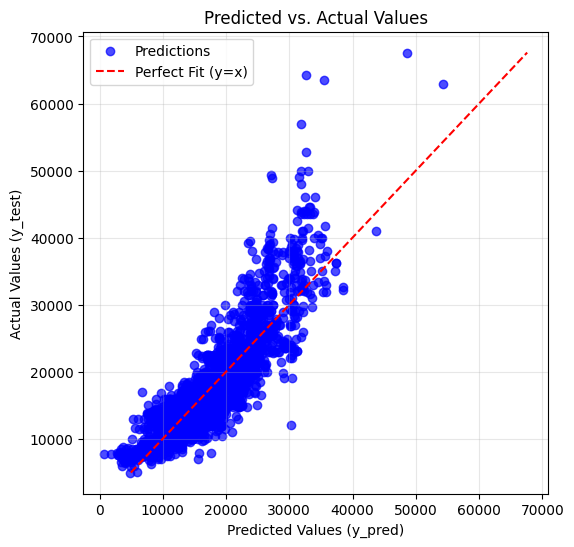

In [24]:
# Predictions
y_pred = linear_regression.predict(X_test)

# Plot y_pred vs. y_test
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit (y=x)')

# Add labels and legend
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Actual Values (y_test)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

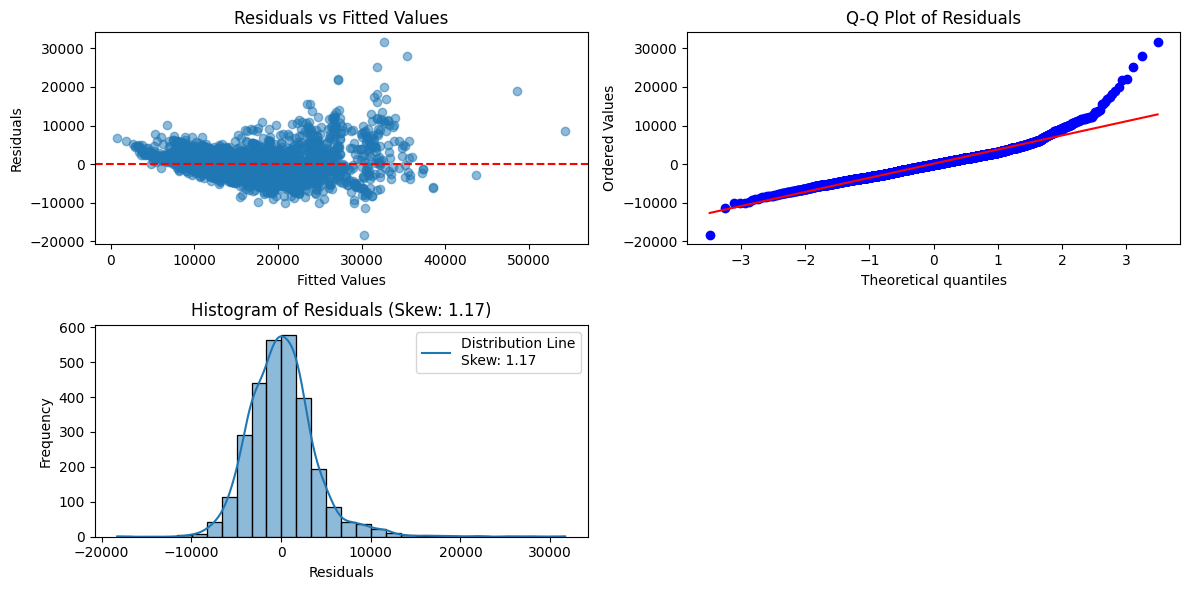

Breusch-Pagan Test p-value: 5.329282205178558e-72


In [25]:
# Checking the assumptions of linear regerssion
# Step 2: Calculate residuals
residuals = y_test - y_pred

# Step 3: Generate diagnostic plots

# 1. Residuals vs Fitted Values (Homoscedasticity check)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 2. Q-Q plot (Normality check)
plt.subplot(2, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# 3. Histogram of Residuals (Normality check)
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
skew_value = skew(residuals)
# Update title and legend
plt.title(f'Histogram of Residuals (Skew: {skew_value:.2f})')
plt.legend([f'Distribution Line\nSkew: {skew_value:.2f}'], loc='upper right')
plt.xlabel('Residuals')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()

# Step 4: Breusch-Pagan Test for Homoscedasticity
# Calculate Breusch-Pagan test using statsmodels, based on the residuals
from statsmodels.stats.diagnostic import het_breuschpagan

# Adding a constant term for the intercept in the regression model (required for the test)
X_test_with_const = sm.add_constant(X_test)

# Perform the Breusch-Pagan test
test_statistic, p_value, _, _ = het_breuschpagan(residuals, X_test_with_const)

# Print Breusch-Pagan Test p-value
print(f"Breusch-Pagan Test p-value: {p_value}")

In [26]:

# Apply Box-Cox transformation to each column
df_numeric = df_numeric.copy()  # Copy the original dataframe to keep the original values
lambda_values = {}  # To store the lambda values for each column
# Replace all 0 value with 0.01
df_numeric.replace({0: 0.001}, inplace=True)

# Loop over each column in the DataFrame
for column in df_numeric.columns:
    if (df_numeric[column] <= 0).any():
        raise ValueError(f"Column '{column}' contains non-positive values, Box-Cox cannot be applied.")
    df_numeric[column], lambda_values[column] = stats.boxcox(df_numeric[column])

# Show the transformed DataFrame and the lambda values for each column
print("Transformed DataFrame:")
print(df_numeric)
print("\nLambda values used for each column:")
print(lambda_values)

Transformed DataFrame:
           price         km     gears       age  previous_owners     hp_kw  \
0      11.323440  74.732149  1.599056  1.343532         0.955899  2.337515   
1      11.209277  83.053319  1.599056  0.785836         0.000000  2.520328   
2      11.222327  84.095833  1.599056  1.343532         0.000000  2.403314   
3      11.209277  80.834780  1.494712  1.343532         0.000000  2.337515   
4      11.408859  51.528370  1.599056  1.343532         0.000000  2.337515   
...          ...        ...       ...       ...              ...       ...   
14237  12.609040   9.487345  1.494712 -2.575124         0.000000  2.481246   
14238  12.607987  25.271721  1.494712 -2.575124         0.000000  2.529164   
14239  12.607987  21.471592  1.494712 -2.575124         0.000000  2.553066   
14240  12.605704  44.354460  1.599056 -2.575124         0.000000  2.553066   
14241  12.605352   4.073535  1.494712 -2.575124         0.000000  2.527725   

       inspection_new  displacement_cc  

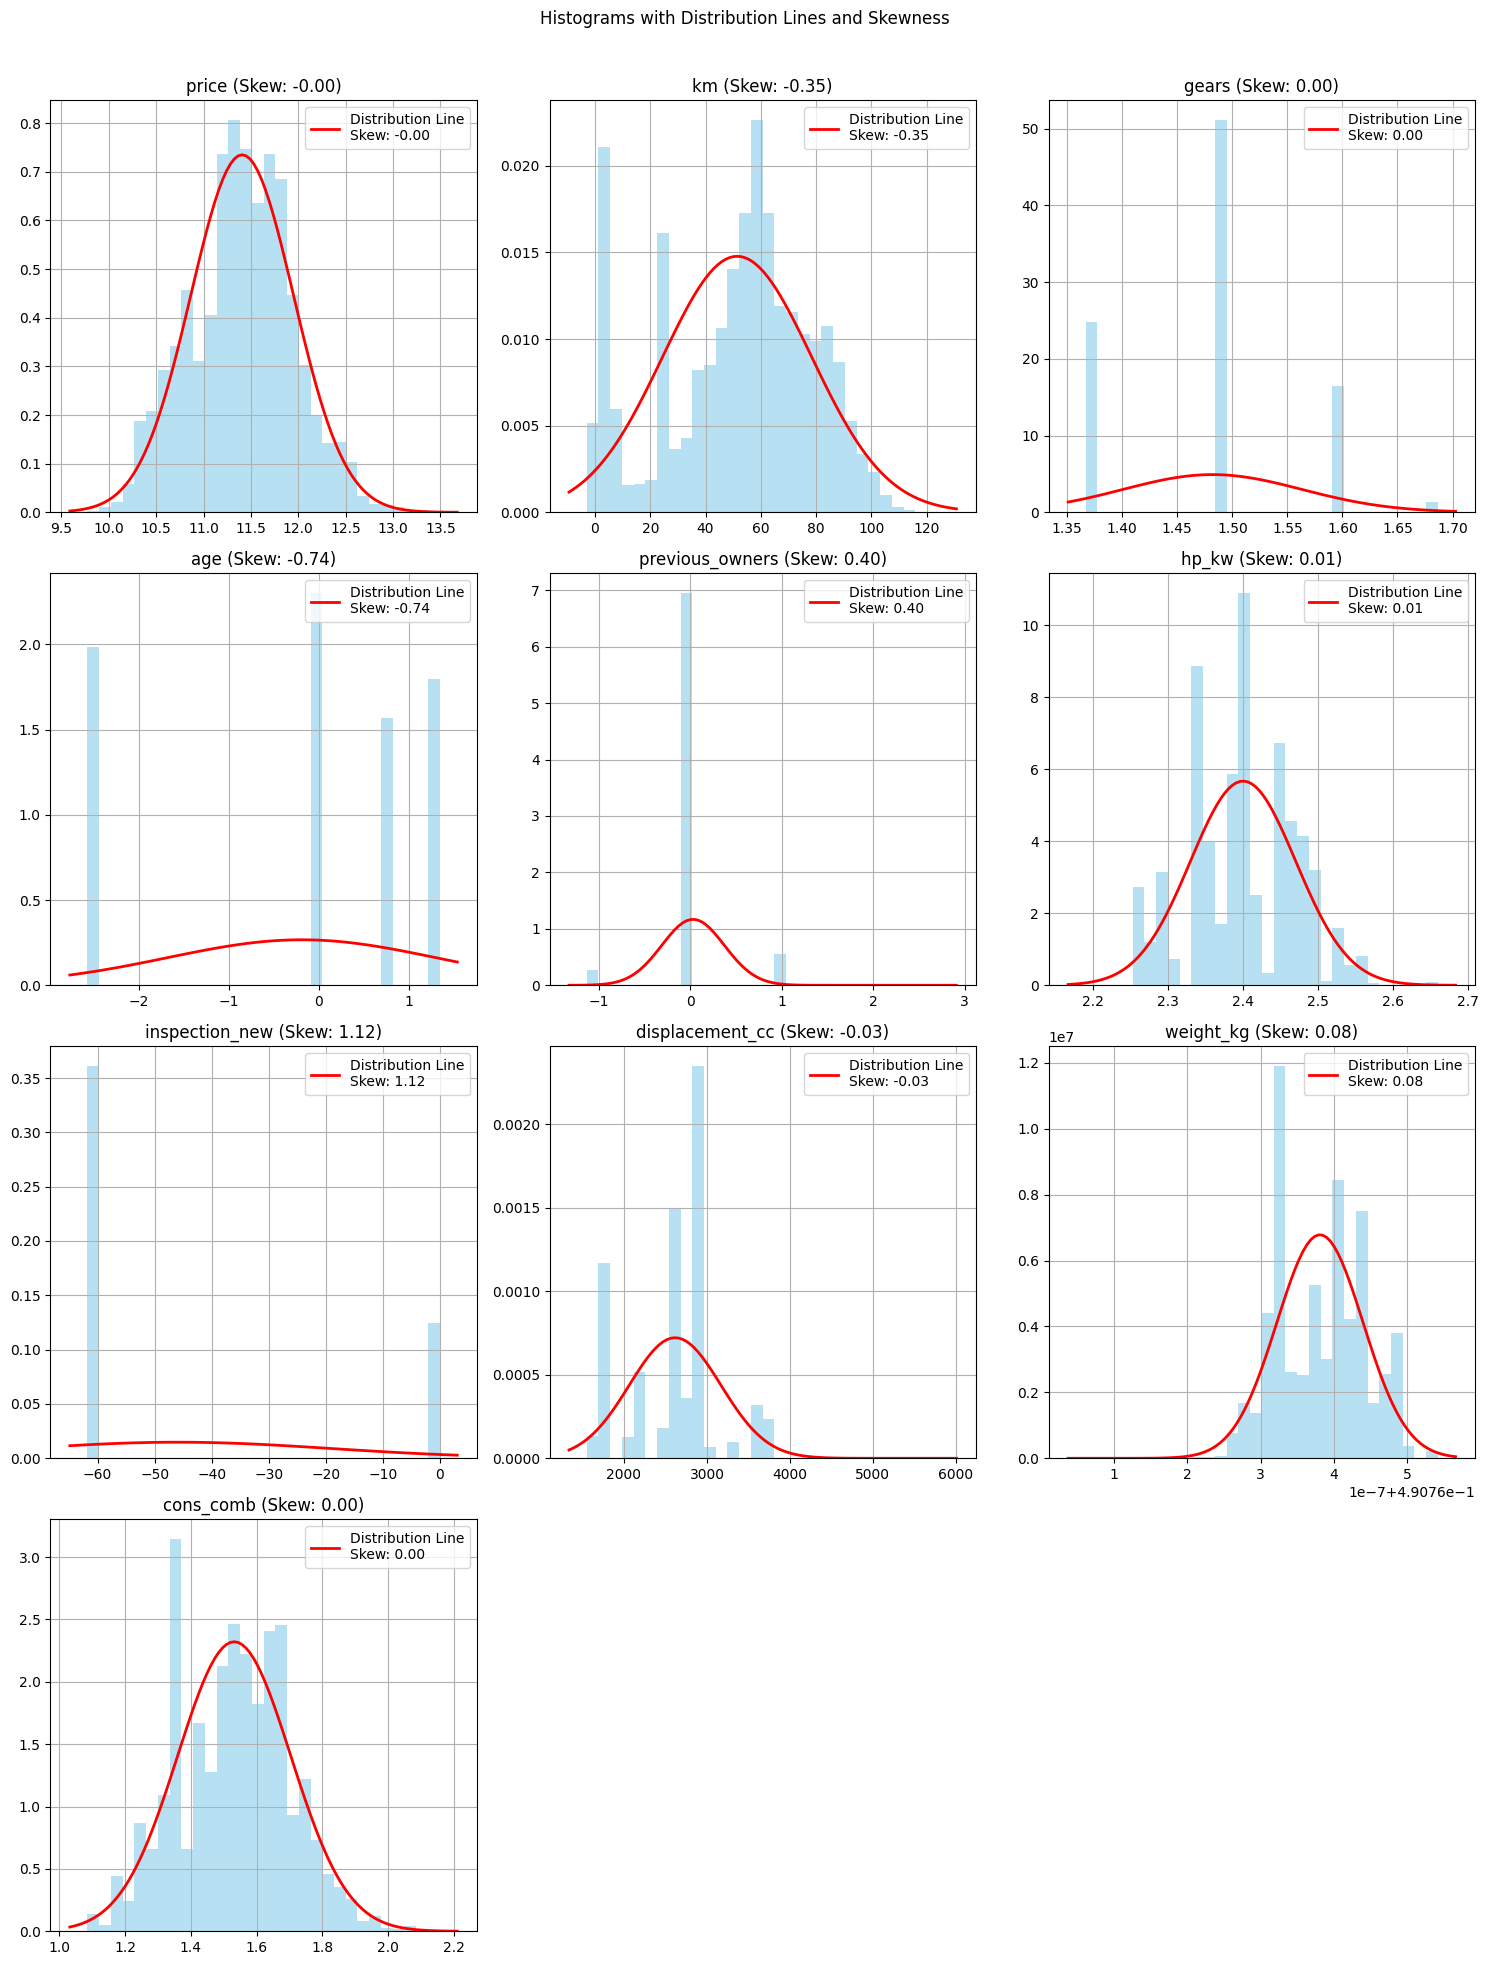

In [27]:

# Checking distribution 

# Create histograms with distribution lines
fig, axes = plt.subplots(len(numeric_cols) // 3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()

for col, ax in zip(numeric_cols, axes):
    # Plot histogram
    df_numeric[col].hist(bins=30, density=True, alpha=0.6, color='skyblue', ax=ax)
    
    # Fit normal distribution
    mean, std = norm.fit(df_numeric[col])
    
    # Generate distribution line
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    ax.plot(x, p, 'r', linewidth=2)

    # Calculate skewness
    skew_val = skew(df_numeric[col].dropna())
    
    # Update title and legend
    ax.set_title(f'{col} (Skew: {skew_val:.2f})')
    ax.legend([f'Distribution Line\nSkew: {skew_val:.2f}'], loc='upper right')

# Remove unused axes
for ax in axes[len(numeric_cols):]:
    ax.set_visible(False)

plt.suptitle('Histograms with Distribution Lines and Skewness')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [28]:
df_numeric

,price,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb
0,11.323440,74.732149,1.599056,1.343532,0.955899,2.337515,0.000000,2588.912104,0.49076,1.315989
1,11.209277,83.053319,1.599056,0.785836,0.000000,2.520328,-61.784838,3347.582240,0.49076,1.691194
2,11.222327,84.095833,1.599056,1.343532,0.000000,2.403314,-61.784838,2941.927483,0.49076,1.315989
3,11.209277,80.834780,1.494712,1.343532,0.000000,2.337515,-61.784838,2588.912104,0.49076,1.315989
4,11.408859,51.528370,1.599056,1.343532,0.000000,2.337515,0.000000,2588.912104,0.49076,1.389761
...,...,...,...,...,...,...,...,...,...,...
14237,12.609040,9.487345,1.494712,-2.575124,0.000000,2.481246,-61.784838,2941.927483,0.49076,1.522053
14238,12.607987,25.271721,1.494712,-2.575124,0.000000,2.529164,-61.784838,3755.499301,0.49076,1.638108
14239,12.607987,21.471592,1.494712,-2.575124,0.000000,2.553066,-61.784838,3347.582240,0.49076,1.877887
14240,12.605704,44.354460,1.599056,-2.575124,0.000000,2.553066,-61.784838,3347.582240,0.49076,1.958950


In [29]:
# Fit after scaling
X = df_numeric.drop('price', axis = 1)
y = df_numeric['price']

In [30]:
# Scale data before coding
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
X = pd.DataFrame(X_scaled, columns=X.columns)
X

,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb
0,0.504012,0.816285,0.399746,0.955899,-0.585414,1.0,-0.105914,-0.344557,-0.850009
1,0.724738,0.816285,0.233813,0.000000,1.041085,0.0,0.925798,-0.214442,0.558541
2,0.752391,0.816285,0.399746,0.000000,0.000000,0.0,0.374150,-0.712877,-0.850009
3,0.665889,0.000000,0.399746,0.000000,-0.585414,0.0,-0.105914,-0.444671,-0.850009
4,-0.111489,0.816285,0.399746,0.000000,-0.585414,1.0,-0.105914,-0.712877,-0.573065
...,...,...,...,...,...,...,...,...,...
14237,-1.226664,0.000000,-0.766187,0.000000,0.693373,0.0,0.374150,0.843782,-0.076428
14238,-0.807970,0.000000,-0.766187,0.000000,1.119703,0.0,1.480523,0.875130,0.359253
14239,-0.908772,0.000000,-0.766187,0.000000,1.332355,0.0,0.925798,0.843782,1.259400
14240,-0.301783,0.816285,-0.766187,0.000000,1.332355,0.0,0.925798,0.808300,1.563719


In [32]:
condition_number = np.linalg.cond(X)
print(f"Condtion_number: {condition_number}")

Condtion_number: 5.397405198459518


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [35]:
linear_regression.score(X_test,y_test)

0.7686960216669314

In [36]:
X

,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb
0,0.504012,0.816285,0.399746,0.955899,-0.585414,1.0,-0.105914,-0.344557,-0.850009
1,0.724738,0.816285,0.233813,0.000000,1.041085,0.0,0.925798,-0.214442,0.558541
2,0.752391,0.816285,0.399746,0.000000,0.000000,0.0,0.374150,-0.712877,-0.850009
3,0.665889,0.000000,0.399746,0.000000,-0.585414,0.0,-0.105914,-0.444671,-0.850009
4,-0.111489,0.816285,0.399746,0.000000,-0.585414,1.0,-0.105914,-0.712877,-0.573065
...,...,...,...,...,...,...,...,...,...
14237,-1.226664,0.000000,-0.766187,0.000000,0.693373,0.0,0.374150,0.843782,-0.076428
14238,-0.807970,0.000000,-0.766187,0.000000,1.119703,0.0,1.480523,0.875130,0.359253
14239,-0.908772,0.000000,-0.766187,0.000000,1.332355,0.0,0.925798,0.843782,1.259400
14240,-0.301783,0.816285,-0.766187,0.000000,1.332355,0.0,0.925798,0.808300,1.563719


In [37]:
# Start using the categorical values in the dataset
X = X.join(df["comfort_convenience"].str.get_dummies(sep=",").add_prefix("cc_")) 
X = X.join(df["body_type"].str.get_dummies(sep=",").add_prefix("cc_")) 
X = X.join(df["make_model"].str.get_dummies(sep=",").add_prefix("mm_")) 
X = X.join(df["entertainment_media"].str.get_dummies(sep=",").add_prefix("em_"))
X = X.join(df["extras"].str.get_dummies(sep=",").add_prefix("ex_"))
X = X.join(df["safety_security"].str.get_dummies(sep=",").add_prefix("ss_")) 
X = X.join(df["vat"].str.get_dummies(sep=",").add_prefix("ss_")) 
X = X.join(df["type"].str.get_dummies(sep=",").add_prefix("ss_")) 
X = X.join(df["fuel"].str.get_dummies(sep=",").add_prefix("ss_")) 

In [38]:
X.shape

(14242, 131)

In [39]:
X

,km,gears,age,previous_owners,hp_kw,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,...,ss_VAT deductible,ss_Demonstration,ss_Employee's car,ss_New,ss_Pre-registered,ss_Used,ss_Benzine,ss_Diesel,ss_Electric,ss_LPG/CNG
0,0.504012,0.816285,0.399746,0.955899,-0.585414,1.0,-0.105914,-0.344557,-0.850009,1,...,1,0,0,0,0,1,0,1,0,0
1,0.724738,0.816285,0.233813,0.000000,1.041085,0.0,0.925798,-0.214442,0.558541,1,...,0,0,0,0,0,1,1,0,0,0
2,0.752391,0.816285,0.399746,0.000000,0.000000,0.0,0.374150,-0.712877,-0.850009,1,...,1,0,0,0,0,1,0,1,0,0
3,0.665889,0.000000,0.399746,0.000000,-0.585414,0.0,-0.105914,-0.444671,-0.850009,0,...,1,0,0,0,0,1,0,1,0,0
4,-0.111489,0.816285,0.399746,0.000000,-0.585414,1.0,-0.105914,-0.712877,-0.573065,1,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14237,-1.226664,0.000000,-0.766187,0.000000,0.693373,0.0,0.374150,0.843782,-0.076428,1,...,1,0,0,0,1,0,0,1,0,0
14238,-0.807970,0.000000,-0.766187,0.000000,1.119703,0.0,1.480523,0.875130,0.359253,1,...,1,0,0,1,0,0,0,1,0,0
14239,-0.908772,0.000000,-0.766187,0.000000,1.332355,0.0,0.925798,0.843782,1.259400,1,...,1,1,0,0,0,0,1,0,0,0
14240,-0.301783,0.816285,-0.766187,0.000000,1.332355,0.0,0.925798,0.808300,1.563719,1,...,1,0,0,0,0,1,1,0,0,0


In [40]:
# Applying PCA to solve multicolinearity
# Step 2: Initialize PCA
# Set the number of components to retain (e.g., 2 components)
pca = PCA(n_components=50)

# Step 3: Fit PCA on the data
X = pca.fit_transform(X)
X
# Step 4: Create a DataFrame with the PCA results
X = pd.DataFrame(
    X, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Step 5: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("PCA Components:")
print(pca.components_)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)

# Resulting PCA-transformed DataFrame
print("\nPCA Transformed DataFrame:")
print(X)

PCA Components:
[[ 1.85770079e-04  1.60419846e-01 -2.13990964e-02 ...  4.84480300e-02
   1.72382436e-05 -1.79954824e-03]
 [ 3.42630189e-01  1.58642368e-01  1.86041325e-01 ...  3.23616044e-01
   2.02433553e-04  1.41878076e-03]
 [ 3.56436509e-01 -1.01734702e-01  2.33078808e-01 ...  6.43728729e-02
   8.88080993e-05  3.68962667e-04]
 ...
 [ 9.57664157e-02  4.34445022e-02 -2.08500826e-02 ...  1.04354925e-02
   7.95314942e-06  3.91689158e-03]
 [ 3.35576714e-02 -4.05534175e-02 -1.37860794e-02 ... -4.43466530e-02
   1.48555650e-03  6.38196969e-03]
 [ 2.64368462e-02  5.02528474e-02 -9.84145244e-03 ...  5.44726655e-02
   5.88968239e-04  4.13490007e-03]]

Explained Variance Ratio:
[0.16657155 0.09112949 0.06014973 0.04673691 0.03393893 0.02687073
 0.02498255 0.02095698 0.01918413 0.01799965 0.0166909  0.01604149
 0.01454613 0.01412257 0.01285803 0.0124644  0.01148966 0.01099334
 0.01079613 0.01051626 0.01030471 0.00996746 0.00967672 0.00942003
 0.00903379 0.00896742 0.00858098 0.00804127 0.007899

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [42]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [43]:
linear_regression.score(X_test,y_test)

0.8562403817125805

In [44]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[ 0.17126037  0.02103046 -0.22426291  0.35209152  0.01538385 -0.02312338
  0.05194741 -0.09037494  0.04368393 -0.04104001 -0.09044943 -0.00954266
  0.01935881 -0.02886389  0.00813226 -0.08131531  0.04990334  0.01428426
 -0.02916373 -0.07604571 -0.04569225  0.00422782 -0.03399831 -0.0134111
  0.06542989  0.07236259  0.03378372  0.0169327   0.03661927 -0.05480226
 -0.00302443 -0.00569495 -0.0118762  -0.04834824  0.00587085 -0.04501281
  0.0201407  -0.06373252 -0.0094627  -0.03002523  0.07823402  0.01767747
  0.04566617 -0.01160372  0.03705738 -0.01854641  0.01495663  0.03842133
  0.03159593 -0.00702328]
11.406005161593802


In [1402]:
y_pred = linear_regression.predict(X_test)


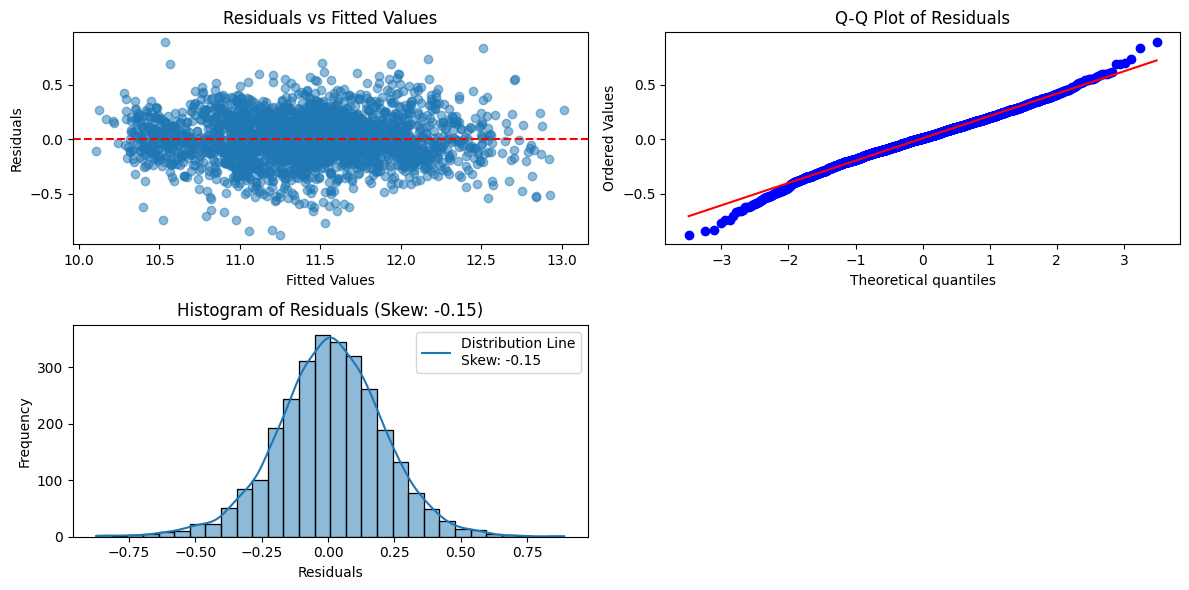

Breusch-Pagan Test p-value: 6.789815844516094e-25


In [1403]:
# Checking the assumptions of linear regerssion
# Step 2: Calculate residuals
residuals = y_test - y_pred

# Step 3: Generate diagnostic plots

# 1. Residuals vs Fitted Values (Homoscedasticity check)
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# 2. Q-Q plot (Normality check)
plt.subplot(2, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

# 3. Histogram of Residuals (Normality check)
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True, bins=30)
plt.title('Histogram of Residuals')
skew_value = skew(residuals)
# Update title and legend
plt.title(f'Histogram of Residuals (Skew: {skew_value:.2f})')
plt.legend([f'Distribution Line\nSkew: {skew_value:.2f}'], loc='upper right')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

# Step 4: Breusch-Pagan Test for Homoscedasticity
# Calculate Breusch-Pagan test using statsmodels, based on the residuals
from statsmodels.stats.diagnostic import het_breuschpagan

# Adding a constant term for the intercept in the regression model (required for the test)
X_test_with_const = sm.add_constant(X_test)

# Perform the Breusch-Pagan test
test_statistic, p_value, _, _ = het_breuschpagan(residuals, X_test_with_const)

# Print Breusch-Pagan Test p-value
print(f"Breusch-Pagan Test p-value: {p_value}")

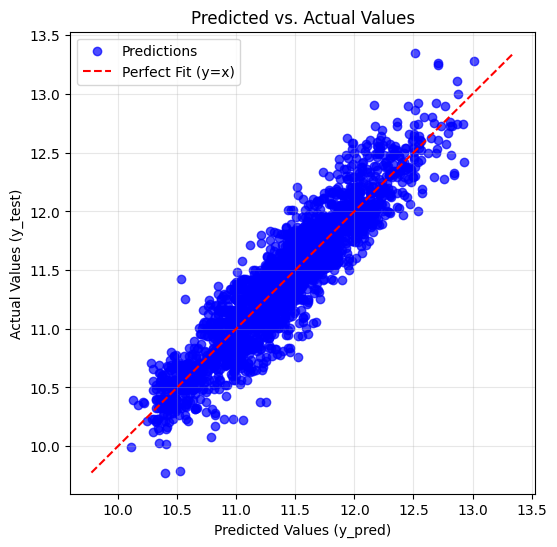

In [1404]:
# Predictions
y_pred = linear_regression.predict(X_test)

# Plot y_pred vs. y_test
plt.figure(figsize=(6, 6))
plt.scatter(y_pred, y_test, color='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit (y=x)')

# Add labels and legend
plt.title('Predicted vs. Actual Values')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Actual Values (y_test)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [50]:
from sklearn.model_selection import cross_val_score
new_model = LinearRegression()
score = cross_val_score(new_model, X, y, cv=10, scoring='r2')

In [51]:
print(score)

[0.25522641 0.58322911 0.2290684  0.80591832 0.71934873 0.80893322
 0.28810823 0.68482468 0.88391601 0.71075896]
